Achaemenid architecture: 392
American craftsman style: 364
American Foursquare architecture: 362
Ancient Egyptian architecture: 406
Art Deco architecture: 566
Art Nouveau architecture: 615
Baroque architecture: 456
Bauhaus architecture: 315
Beaux-Arts architecture: 424
Byzantine architecture: 313
Chicago school architecture: 278
Colonial architecture: 480
Deconstructivism: 335
Edwardian architecture: 280
Georgian architecture: 381
Gothic architecture: 331
Greek Revival architecture: 523
International style: 417
Novelty architecture: 382
Palladian architecture: 343
Postmodern architecture: 322
Queen Anne architecture: 720
Romanesque architecture: 301
Russian Revival architecture: 352
Tudor Revival architecture: 455

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
from torchvision import datasets, models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset, random_split
import pdb

class_mapping = {
    'Achaemenid architecture': 0,
    'American craftsman style': 1,
    'American Foursquare architecture': 2,
    'Ancient Egyptian architecture': 3,
    'Art Deco architecture': 4,
    'Art Nouveau architecture': 5,
    'Baroque architecture': 6,
    'Bauhaus architecture': 7,
    'Beaux-Arts architecture': 8,
    'Byzantine architecture': 9,
    'Chicago school architecture': 10,
    'Colonial architecture': 11,
    'Deconstructivism': 12,
    'Edwardian architecture': 13,
    'Georgian architecture': 14,
    'Gothic architecture': 15,
    'Greek Revival architecture': 16,
    'International style': 17,
    'Novelty architecture': 18,
    'Palladian architecture': 19,
    'Postmodern architecture': 20,
    'Queen Anne architecture': 21,
    'Romanesque architecture': 22,
    'Russian Revival architecture': 23,
    'Tudor Revival architecture': 24
}

data_dir = './architectural-styles-dataset'

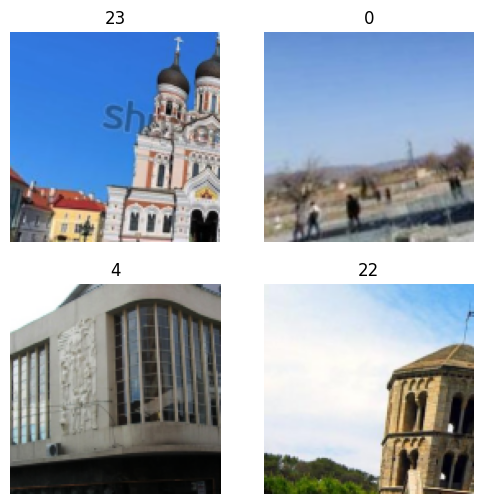

In [3]:
from fastai.vision.all import *
from fastai.text.all import *
from pathlib import Path

presize = (799, 600)
final_size = 128

item_tfms = Resize(presize)
batch_tfms = [*aug_transforms(min_scale=0.5, size=final_size), Normalize.from_stats(*imagenet_stats)]


def custom_get_image_files(path):
    image_files = []
    path = Path(path)
    for style_dir in path.iterdir():
        if style_dir.is_dir():
            style_name = style_dir.name
            image_files.extend([str(img) for img in style_dir.glob("*.*")])
    return image_files


data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=custom_get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=Pipeline([parent_label, lambda x: class_mapping[x]]),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

dls = data.dataloaders(data_dir, bs=64)

dls.show_batch(max_n=4)


In [3]:
torch.cuda.empty_cache()

model = models.resnet50(pretrained=True)
num_classes = len(dls.vocab)
model.fc = nn.Linear(model.fc.in_features, num_classes)

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

learn.fit_one_cycle(5, 3e-3)

C:\Users\newuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\newuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.382093,3.488098,0.214639,04:23
1,2.105661,2.246969,0.361029,04:21
2,1.819427,1.672365,0.460435,04:21
3,1.538656,1.351151,0.573195,04:21
4,1.286667,1.240031,0.614738,04:11


C:\Users\newuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\newuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.00013182566908653826)

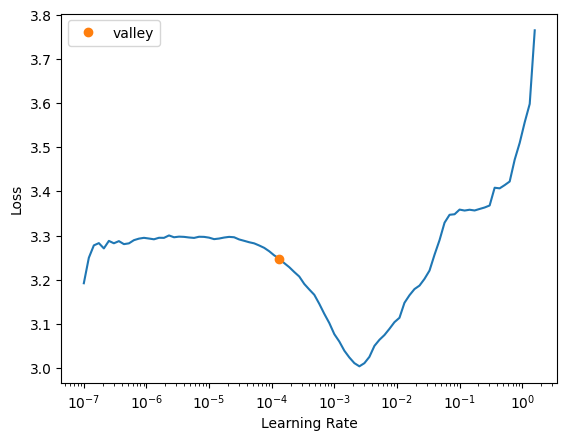

In [6]:
model = models.resnet50(pretrained=True)
num_classes = len(dls.vocab)
model.fc = nn.Linear(model.fc.in_features, num_classes)

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy, cbs=MixUp())
learn.lr_find()

Now I update the code with suggested learning rate and increased image size

In [7]:
from fastai.vision.all import *
from fastai.text.all import *
from pathlib import Path

presize = (799, 600)
final_size = 224

item_tfms = Resize(presize)
batch_tfms = [*aug_transforms(min_scale=0.5, size=final_size), Normalize.from_stats(*imagenet_stats)]


def custom_get_image_files(path):
    image_files = []
    path = Path(path)
    for style_dir in path.iterdir():
        if style_dir.is_dir():
            style_name = style_dir.name
            image_files.extend([str(img) for img in style_dir.glob("*.*")])
    return image_files

C:\Users\newuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\newuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,2.328812,1.376968,0.566271,07:26
1,1.809558,1.116335,0.661227,07:13
2,1.579267,0.995668,0.694362,07:18
3,1.434779,0.889729,0.739367,07:07
4,1.332253,0.866864,0.747774,07:21


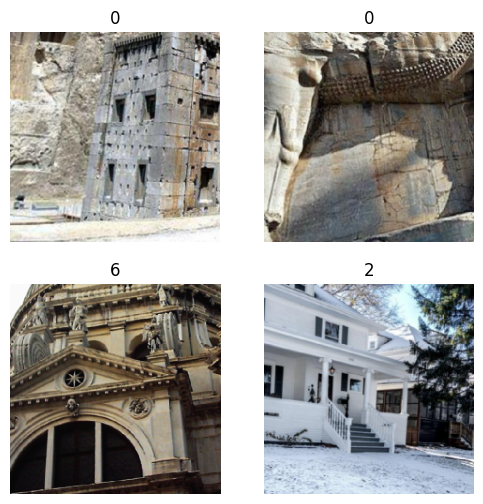

In [5]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=custom_get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=Pipeline([parent_label, lambda x: class_mapping[x]]),
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

dls = data.dataloaders(data_dir, bs=64)
dls.show_batch(max_n=4)

model = models.resnet50(pretrained=True)
num_classes = len(dls.vocab)
model.fc = nn.Linear(model.fc.in_features, num_classes)

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy, cbs=MixUp())
learn.fit_one_cycle(5, lr_max=0.00013182566908653826)

In [7]:
learn.save("architecture_style_classifier_model")

Path('models/architecture_style_classifier_model.pth')

Architecture styles to add:
-Japanese 293 Images
-Brutalism 300 Images
-Deconstructivism 307 Images
-Rococo 126 Images
-Vernacular
-Islamic
-Expressionist
-Federal
-Indo-Saracenic
-Hawaiian


-romanesque?
-Renaissance? (Between classic and gothic)

The number of styles in the dataset is: 25


C:\Users\newuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\newuser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


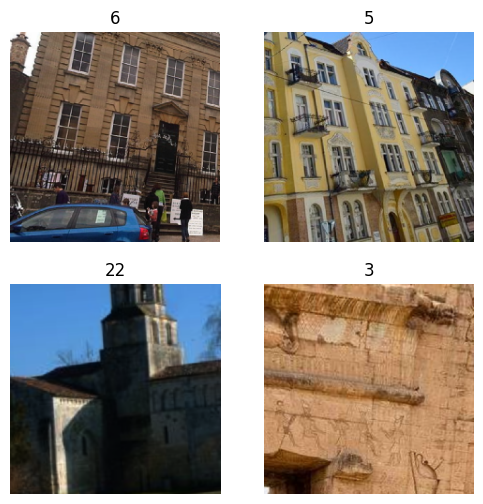

In [5]:
class_mapping = {
    'Achaemenid architecture': 0,
    'American craftsman style': 1,
    'American Foursquare architecture': 2,
    'Ancient Egyptian architecture': 3,
    'Art Deco architecture': 4,
    'Art Nouveau architecture': 5,
    'Baroque architecture': 6,
    'Bauhaus architecture': 7,
    'Beaux-Arts architecture': 8,
    'Brutalism architecture': 9,
    'Byzantine architecture': 10,
    'Chicago school architecture': 11,
    'Classical': 12,
    'Colonial architecture': 13,
    'Deconstructivism': 14,
    'Edwardian architecture': 15,
    'Georgian architecture': 16,
    'Gothic architecture': 17,
    'Greek Revival architecture': 18,
    'International style': 19,
    'Japanese': 20,
    'Novelty architecture': 21,
    'Palladian architecture': 22,
    'Postmodern architecture': 23,
    'Queen Anne architecture': 24,
    'Romanesque architecture': 25,
    'Russian Revival architecture': 26,
    'Tudor Revival architecture': 27
}
num_styles = len(class_mapping)
print(f'The number of styles in the dataset is: {num_styles}')
data_dir = './architectural-styles-dataset'

def custom_get_y(x):
    style_name = Path(x).parent.name
    return class_mapping.get(style_name, 0)  

from fastai.vision.all import *
from fastai.text.all import *
from pathlib import Path

presize = (799, 600)
final_size = 224

item_tfms = Resize(presize)
batch_tfms = [*aug_transforms(min_scale=0.5, size=final_size), Normalize.from_stats(*imagenet_stats)]


def custom_get_image_files(path):
    image_files = []
    path = Path(path)
    for style_dir in path.iterdir():
        if style_dir.is_dir():
            style_name = style_dir.name
            image_files.extend([str(img) for img in style_dir.glob("*.*")])
    return image_files
    
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=custom_get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=custom_get_y,  # Use the named function here
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)


dls = data.dataloaders(data_dir, bs=64)
dls.show_batch(max_n=4)

model = models.resnet50(pretrained=True)
num_classes = len(dls.vocab)
model.fc = nn.Linear(model.fc.in_features, num_classes)

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy, cbs=MixUp())

In [11]:
learn.fit_one_cycle(5, lr_max=0.00013182566908653826)

epoch,train_loss,valid_loss,accuracy,time
0,2.348689,1.377520,0.571711,05:25
1,1.795545,1.151256,0.654303,06:07
2,1.578083,1.001031,0.709693,05:53
3,1.426863,0.875995,0.737389,06:20
4,1.327291,0.854592,0.744313,06:34


In [12]:
learn.export("./classifier123_export.pkl")
learn.save("classifier_save")

Path('models/classifier_save.pth')